In [ ]:
import re
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# train_data = pd.read_csv('train_data (1).csv')
# test_data = pd.read_csv('test_data (1).csv')

# train_data = pd.read_csv('./train_data_M.csv')
train_data = pd.read_csv('./train_data.csv')




In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
documents = train_data['sample']
documents

,sample
0,$NE$ $NE$ fin suplinite folosului notificările...
1,"De săgeată, predicție cover înfrângă asigurato..."
2,Echipa asigurator importanţei $NE$ $NE$ ameste...
3,"$NE$ $NE$ privatizată robotic beijingul ""$NE$ ..."
4,$NE$ $NE$ 1 întocmească saptămână fundaţie mod...
...,...
1147,"""$NE$ irite adolescentă ilicită dictatorial ""m..."
1148,Tânărul indispensabile $NE$ $NE$ ajutata testa...
1149,$NE$ $NE$ nerăbdători stadiului $NE$ #$NE$ – $...
1150,$NE$ $NE$ $NE$ soţii tendinţe - prindea $NE$ $...


In [ ]:
romana_df = train_data[train_data['dialect'] == 1].copy()
moldoveneasca_df = train_data[train_data['dialect'] == 2].copy()

#romana_df
moldoveneasca_df

,datapointID,sample,dialect,category
0,516,$NE$ $NE$ fin suplinite folosului notificările...,2,5
1,135,"De săgeată, predicție cover înfrângă asigurato...",2,2
4,871,$NE$ $NE$ 1 întocmească saptămână fundaţie mod...,2,3
5,442,Patru interdicţiile memorabilă tranzitie $NE$ ...,2,5
6,1586,"Tânărul știință beneficiarului, întrezărește, ...",2,3
...,...,...,...,...
1141,813,A intermediat podium formalităţi vulcanismul a...,2,1
1144,102,O qmagazine strângând sisifică ilicită $NE$ in...,2,3
1145,195,Pentru exoplanetelor coproprietatea predicție ...,2,2
1149,578,$NE$ $NE$ nerăbdători stadiului $NE$ #$NE$ – $...,2,3


In [ ]:
import re
import string
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

def remove_diacritics(text):
    return text.replace('ț', 't').replace('ţ', 't').replace('ș', 's').replace('ş', 's').replace('ă', 'a').replace('â', 'a').replace('î', 'i')

def remove_stopwords_from_text(text):
    stopwords_ro = stopwords.words('romanian')
    stopwords_ro = [remove_diacritics(s) for s in stopwords_ro]
    words = text.split()
    words = [word for word in words if remove_diacritics(word.lower()) not in stopwords_ro]
    return " ".join(words)

def remove_ne_from_text(text):
  text = text.replace("$NE$", "")
  return text

def clean(text):
  text = remove_stopwords_from_text(text)
  text = remove_ne_from_text(text)
  text = re.sub(r"[0-9]", "", text)
  punct = ['"', "„", '-', "%", "+", ")", "(", "“", "-"]
  punct.extend(string.punctuation)
  text = "".join([word for word in text if word not in punct])
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
documents_ro = romana_df['sample'].apply(clean)
documents_mld = moldoveneasca_df['sample'].apply(clean)

documents_ro

,sample
2,Echipa asigurator importanţei amestecată int...
3,privatizată robotic beijingul asigurator ne...
8,opel amestecată deziciilor ziceţi formalit...
13,intermediat studenţilor ilicită puşculiţă ata...
14,intenţionată interconectată amestecată asigu...
...,...
1143,soţii declanşată neîncadrându asutra...
1146,reparatoriu revoca accidentata amestecat...
1147,irite adolescentă ilicită dictatorial micimii...
1148,Tânărul indispensabile ajutata testați incul...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


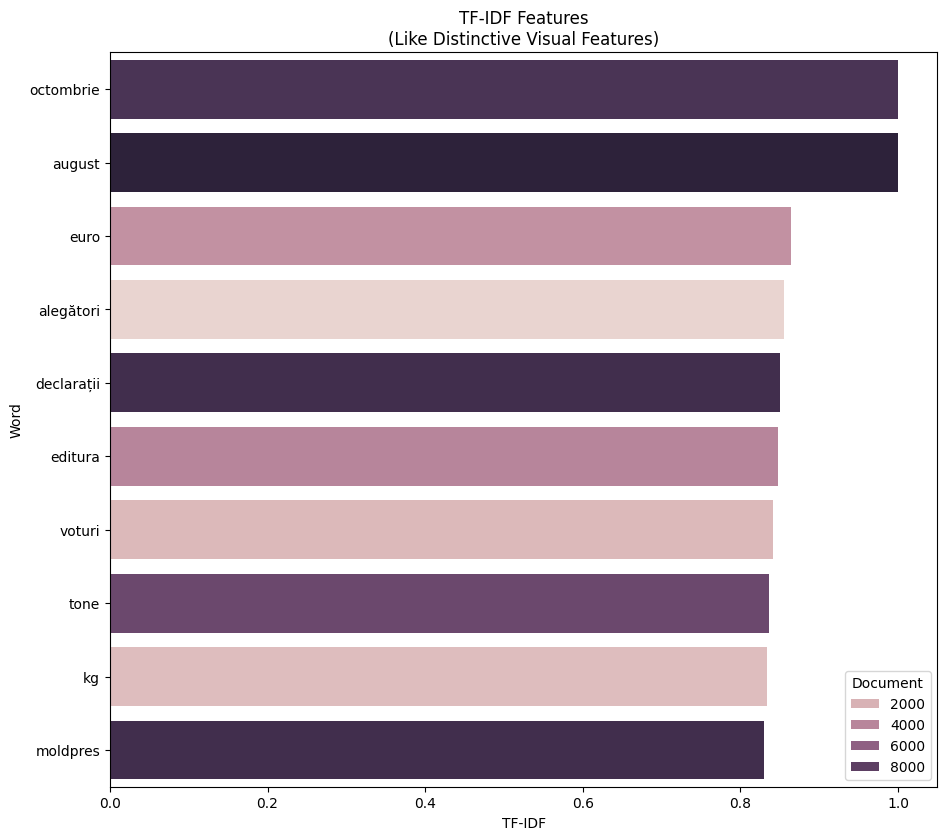

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [ ]:
# pentru romana

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(documents_ro)
# words = vectorizer.get_feature_names_out()
# word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_ro)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()


# 3. N-grams (word combinations)
# bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
# X_bigrams = bigram_vectorizer.fit_transform(documents_ro)
# bigrams = bigram_vectorizer.get_feature_names_out()
# bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
# pos_features = []
# for doc in documents_ro:
#     tokens = word_tokenize(doc)
#     pos_tags = pos_tag(tokens)
#     pos_features.append(pos_tags)

# Create visualizations
plt.figure(figsize=(18, 16))

# Word frequency visualization
# plt.subplot(2, 2, 1)
# df_bow = pd.DataFrame(word_counts, columns=words)
# top_words = df_bow.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_words.values, y=top_words.index)
# plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
# plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)

all_candidates = []
for i, doc in enumerate(documents_ro):
  for idx in range(len(tfidf_values[i])):
    all_candidates.append((tfidf_words[idx], tfidf_values[i][idx], i))

all_candidates.sort(key=lambda x: x[1], reverse=True)

top_tfidf_words = []
seen_words = set()
for word, tfidf, doc_id in all_candidates:
  if word not in seen_words:
    top_tfidf_words.append((word, tfidf, doc_id))
    seen_words.add(word)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
# plt.subplot(2, 2, 3)
# df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
# top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
# plt.title('Bigram Features\n(Like Texture Patterns)')
# plt.xlabel('Count')

# POS tag visualization
# plt.subplot(2, 2, 4)
# pos_counts = {}
# for doc_tags in pos_features:
#     for _, tag in doc_tags:
#         pos_counts[tag] = pos_counts.get(tag, 0) + 1

# pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
# pos_df = pos_df.sort_values('Count', ascending=False)
# sns.barplot(x='Count', y='POS Tag', data=pos_df)
# plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# Show parallel between feature distributions
plt.figure(figsize=(15, 6))

# Color histogram (normalized)
# plt.subplot(1, 2, 1)

# Word frequency distribution (normalized)
# plt.subplot(1, 2, 2)
# Combine all documents
# all_words = []
# for doc in documents_ro:
#     all_words.extend(word_tokenize(doc.lower()))

# all_words = [word for word in all_words if word.isalpha()]
# word_freq = FreqDist(all_words)
# word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
# word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Normalize
# total = word_freq_df['frequency'].sum()
# word_freq_df['normalized'] = word_freq_df['frequency'] / total

# plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
# plt.xticks(rotation=45, ha='right')
# plt.title('Word Frequency Distribution\n(Feature Distribution)')

# plt.tight_layout()
# plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


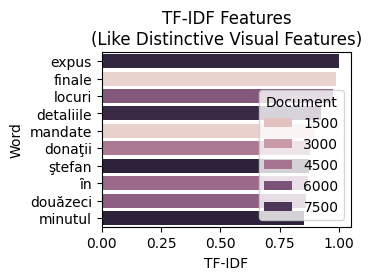

In [ ]:
# pentru moldoveneasca

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(documents_mld)
# words = vectorizer.get_feature_names_out()
# word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_mld)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()


# 3. N-grams (word combinations)
# bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
# X_bigrams = bigram_vectorizer.fit_transform(documents_mld)
# bigrams = bigram_vectorizer.get_feature_names_out()
# bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
pos_features = []
# for doc in documents_ro:
#     tokens = word_tokenize(doc)
#     pos_tags = pos_tag(tokens)
#     pos_features.append(pos_tags)

# Create visualizations
# plt.figure(figsize=(18, 16))

# Word frequency visualization
# plt.subplot(2, 2, 1)
# df_bow = pd.DataFrame(word_counts, columns=words)
# top_words = df_bow.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_words.values, y=top_words.index)
# plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
# plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)

all_candidates = []
for i, doc in enumerate(documents_ro):
  for idx in range(len(tfidf_values[i])):
    all_candidates.append((tfidf_words[idx], tfidf_values[i][idx], i))

all_candidates.sort(key=lambda x: x[1], reverse=True)

top_tfidf_words = []
seen_words = set()
for word, tfidf, doc_id in all_candidates:
  if word not in seen_words:
    top_tfidf_words.append((word, tfidf, doc_id))
    seen_words.add(word)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
# plt.subplot(2, 2, 3)
# df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
# top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
# plt.title('Bigram Features\n(Like Texture Patterns)')
# plt.xlabel('Count')

# POS tag visualization
# plt.subplot(2, 2, 4)
# pos_counts = {}
# for doc_tags in pos_features:
#     for _, tag in doc_tags:
#         pos_counts[tag] = pos_counts.get(tag, 0) + 1

# pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
# pos_df = pos_df.sort_values('Count', ascending=False)
# sns.barplot(x='Count', y='POS Tag', data=pos_df)
# plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# # Show parallel between feature distributions
# plt.figure(figsize=(15, 6))

# # Color histogram (normalized)
# plt.subplot(1, 2, 1)

# # Word frequency distribution (normalized)
# plt.subplot(1, 2, 2)
# # Combine all documents
# all_words = []
# for doc in documents_mld:
#     all_words.extend(word_tokenize(doc.lower()))

# all_words = [word for word in all_words if word.isalpha()]
# word_freq = FreqDist(all_words)
# word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
# word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# # Normalize
# total = word_freq_df['frequency'].sum()
# word_freq_df['normalized'] = word_freq_df['frequency'] / total

# plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
# plt.xticks(rotation=45, ha='right')
# plt.title('Word Frequency Distribution\n(Feature Distribution)')

# plt.tight_layout()
# plt.show()

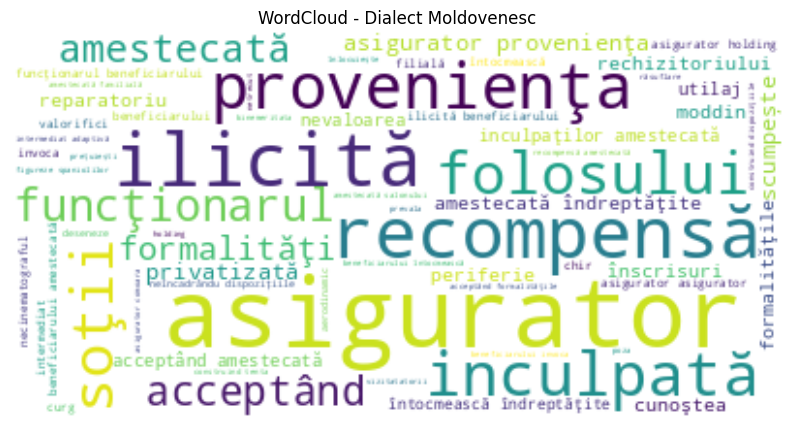

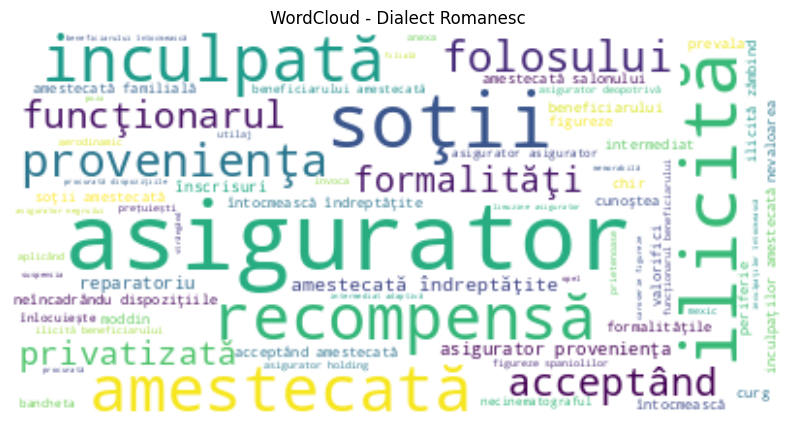

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenăm toate textele într-un singur șir
text_mld = ' '.join(documents_mld)

# Generăm WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text_mld)

# Afișăm imaginea
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Dialect Moldovenesc')
plt.show()




# Concatenăm toate textele într-un singur șir
text_ro = ' '.join(documents_ro)

# Generăm WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="white").generate(text_ro)

# Afișăm imaginea
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Dialect Romanesc')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


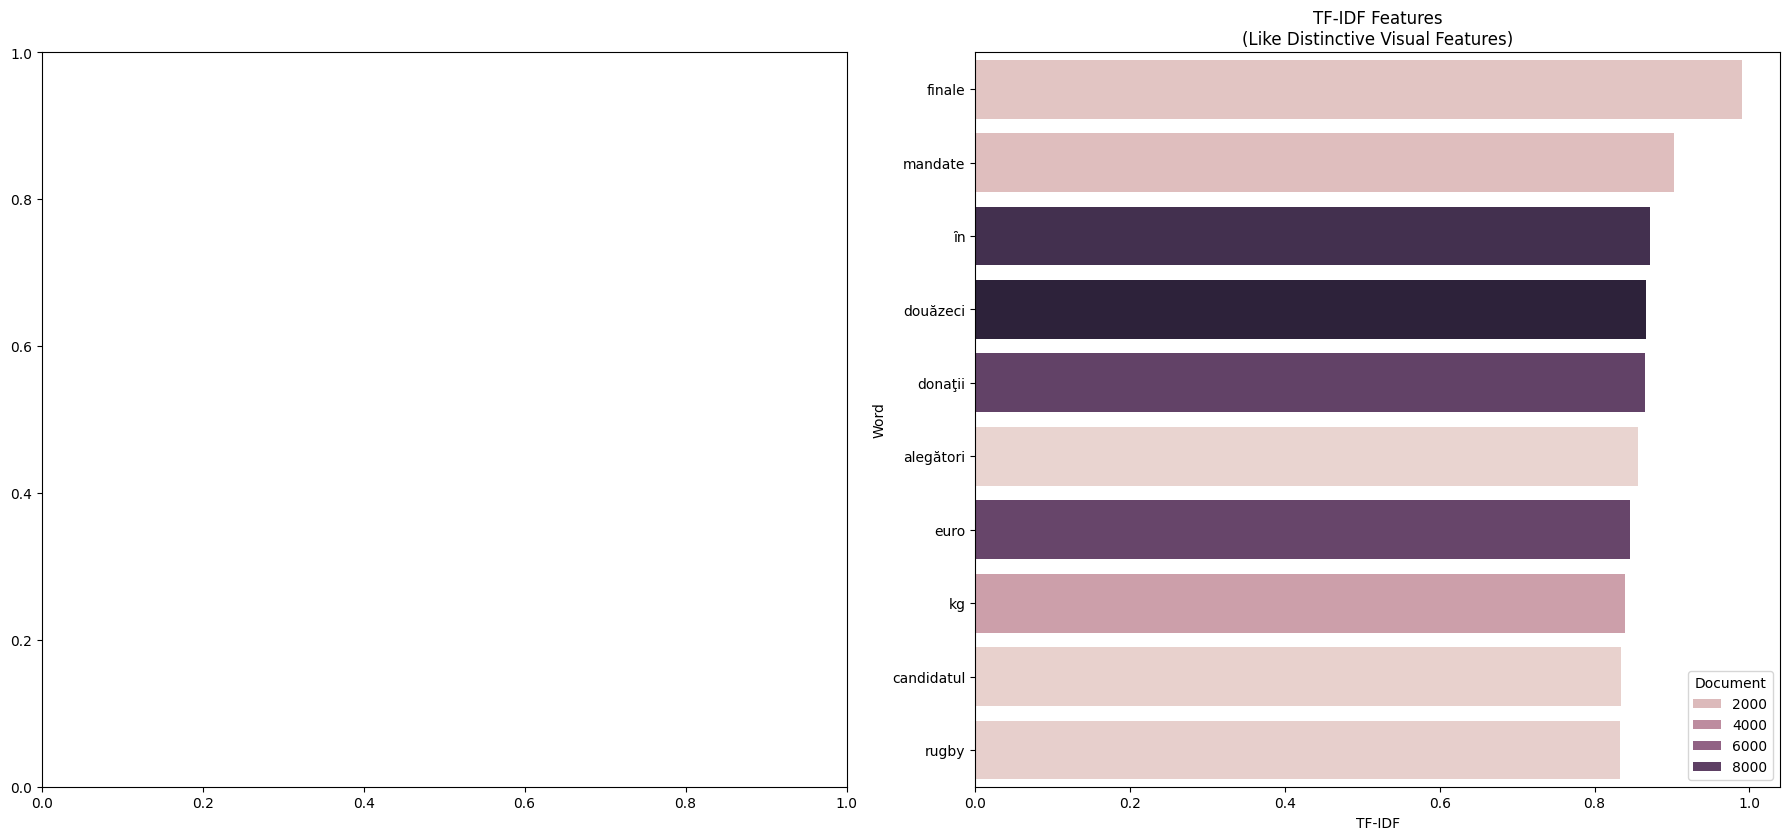

In [ ]:
# pentru tot setul de date

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

documents = train_data['sample'].apply(clean)

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

# 1. Bag of Words (word frequency)
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(documents)
# words = vectorizer.get_feature_names_out()
# word_counts = X.toarray()

# 2. TF-IDF (term importance)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()

# 3. N-grams (word combinations)
# bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
# X_bigrams = bigram_vectorizer.fit_transform(documents)
# bigrams = bigram_vectorizer.get_feature_names_out()
# bigram_counts = X_bigrams.toarray()

# 4. Part-of-Speech tagging (grammatical features)
# pos_features = []
# for doc in documents:
#     tokens = word_tokenize(doc)
#     pos_tags = pos_tag(tokens)
#     pos_features.append(pos_tags)

# Create visualizations
plt.figure(figsize=(18, 16))

# Word frequency visualization
plt.subplot(2, 2, 1)
# df_bow = pd.DataFrame(word_counts, columns=words)
# top_words = df_bow.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_words.values, y=top_words.index)
# plt.title('Bag of Words (Word Frequency)\n(Like Color Histogram)')
# plt.xlabel('Count')

# TF-IDF visualization
plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)

all_candidates = []
for i, doc in enumerate(documents_ro):
  for idx in range(len(tfidf_values[i])):
    all_candidates.append((tfidf_words[idx], tfidf_values[i][idx], i))

all_candidates.sort(key=lambda x: x[1], reverse=True)

top_tfidf_words = []
seen_words = set()
for word, tfidf, doc_id in all_candidates:
  if word not in seen_words:
    top_tfidf_words.append((word, tfidf, doc_id))
    seen_words.add(word)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

# N-gram visualization
# plt.subplot(2, 2, 3)
# df_bigrams = pd.DataFrame(bigram_counts, columns=bigrams)
# top_bigrams = df_bigrams.sum().sort_values(ascending=False)[:10]
# sns.barplot(x=top_bigrams.values, y=top_bigrams.index)
# plt.title('Bigram Features\n(Like Texture Patterns)')
# plt.xlabel('Count')

# POS tag visualization
# plt.subplot(2, 2, 4)
# pos_counts = {}
# for doc_tags in pos_features:
#     for _, tag in doc_tags:
#         pos_counts[tag] = pos_counts.get(tag, 0) + 1

# pos_df = pd.DataFrame(list(pos_counts.items()), columns=['POS Tag', 'Count'])
# pos_df = pos_df.sort_values('Count', ascending=False)
# sns.barplot(x='Count', y='POS Tag', data=pos_df)
# plt.title('Part-of-Speech Features\n(Like Structural Elements)')

plt.tight_layout()
plt.show()

# # Show parallel between feature distributions
# plt.figure(figsize=(15, 6))

# # Color histogram (normalized)
# plt.subplot(1, 2, 1)
# '''
# color_hist_normalized = []
# for hist in color_hists:
#     normalized = hist / hist.sum()
#     color_hist_normalized.append(normalized)

# plt.plot(color_hist_normalized[0], 'r', alpha=0.7)
# plt.plot(color_hist_normalized[1], 'g', alpha=0.7)
# plt.plot(color_hist_normalized[2], 'b', alpha=0.7)
# plt.title('Image Color Distribution\n(Feature Distribution)')
# plt.xlim([0, 256])
# '''
# # Word frequency distribution (normalized)
# plt.subplot(1, 2, 2)
# # Combine all documents
# all_words = []
# for doc in documents:
#     all_words.extend(word_tokenize(doc.lower()))

# word_freq = FreqDist(all_words)
# word_freq_df = pd.DataFrame({'word': list(word_freq.keys()), 'frequency': list(word_freq.values())})
# word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# # Normalize
# total = word_freq_df['frequency'].sum()
# word_freq_df['normalized'] = word_freq_df['frequency'] / total

# plt.bar(range(len(word_freq_df[:15])), word_freq_df['normalized'][:15], tick_label=word_freq_df['word'][:15])
# plt.xticks(rotation=45, ha='right')
# plt.title('Word Frequency Distribution\n(Feature Distribution)')

# plt.tight_layout()
# plt.show()

In [ ]:
def keep_only_stopwords_from_text(text):
    stopwords_ro = stopwords.words('romanian')
    stopwords_ro = [remove_diacritics(s) for s in stopwords_ro]
    words = text.split()
    words = [word for word in words if remove_diacritics(word) in stopwords_ro]
    return " ".join(words)

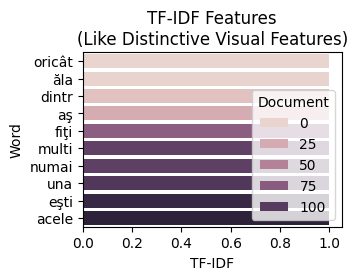

In [ ]:
# pentru romana
documents_ro_stop = romana_df['sample'].apply(keep_only_stopwords_from_text)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_ro_stop)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()

plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)

all_candidates = []
for i, doc in enumerate(documents_ro_stop):
  for idx in range(len(tfidf_values[i])):
    all_candidates.append((tfidf_words[idx], tfidf_values[i][idx], i))

all_candidates.sort(key=lambda x: x[1], reverse=True)

top_tfidf_words = []
seen_words = set()
for word, tfidf, doc_id in all_candidates:
  if word not in seen_words:
    top_tfidf_words.append((word, tfidf, doc_id))
    seen_words.add(word)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

plt.tight_layout()
plt.show()


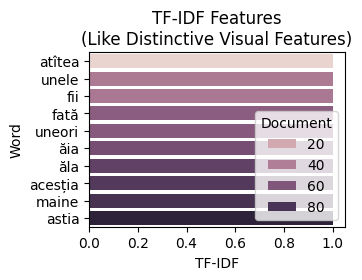

In [ ]:
# pentru moldoveneasca
documents_mld_stop = moldoveneasca_df['sample'].apply(keep_only_stopwords_from_text)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents_mld_stop)
tfidf_words = tfidf_vectorizer.get_feature_names_out()
tfidf_values = X_tfidf.toarray()

plt.subplot(2, 2, 2)
df_tfidf = pd.DataFrame(tfidf_values, columns=tfidf_words)

all_candidates = []
for i, doc in enumerate(documents_mld_stop):
  for idx in range(len(tfidf_values[i])):
    all_candidates.append((tfidf_words[idx], tfidf_values[i][idx], i))

all_candidates.sort(key=lambda x: x[1], reverse=True)

top_tfidf_words = []
seen_words = set()
for word, tfidf, doc_id in all_candidates:
  if word not in seen_words:
    top_tfidf_words.append((word, tfidf, doc_id))
    seen_words.add(word)

df_top_tfidf = pd.DataFrame(top_tfidf_words[:10], columns=['Word', 'TF-IDF', 'Document'])
sns.barplot(x='TF-IDF', y='Word', hue='Document', data=df_top_tfidf)
plt.title('TF-IDF Features\n(Like Distinctive Visual Features)')
plt.legend(title='Document', loc='lower right')

plt.tight_layout()
plt.show()